# Convolutional Neural Network (CNN)

Les Réseaux de Neurones Convolutifs, ou CNN (Convolutional Neural Networks), sont une classe spécialisée de réseaux de neurones profonds utilisée pour le traitement et l'analyse des images.
Ce Notebook vise à vous montrer les différents filtres que l'on peut appliquer, leurs effets sur des images, ainsi qu'entrainer un réseau de neurones pour une tache de classification.

## Modules / Frameworks

Lors de la mise en œuvre de réseaux de neurones convolutifs (CNN), plusieurs modules et bibliothèques sont couramment utilisés pour diverses tâches telles que la manipulation de matrices, la gestion et l'affichage d'images, et l'apprentissage automatique. Voici une description des principaux modules.

In [1]:
!pip install kaggle kagglehub torch tensorflow scikit-learn opencv-python matplotlib Pillow scipy

### Manipulation de Matrices & Convolution

#### Numpy :
NumPy est une bibliothèque fondamentale pour le calcul scientifique en Python. Elle permet de créer et de manipuler facilement des tableaux multidimensionnels (matrices), qui sont essentiels pour les calculs de convolution dans les CNN.

In [2]:
import numpy as np

#### SciPy : 
SciPy est une bibliothèque utilisée pour les calculs scientifiques et techniques. Elle inclut des modules pour l'optimisation, l'intégration, l'interpolation, la résolution d'équations différentielles, et plus encore. Le sous-module ndimage est particulièrement utile pour le traitement d'images.

In [3]:
from scipy.ndimage import convolve

###  Gestion et Affichage des Images

#### PIL/Pillow :
Pillow est une bibliothèque Python pour l'ouverture, la manipulation et l'enregistrement de différents formats d'image. Elle est souvent utilisée pour charger et prétraiter les images avant de les passer à un modèle CNN.

In [4]:
from PIL import Image

#### Matplotlib :
Matplotlib est une bibliothèque de visualisation 2D en Python. Elle est couramment utilisée pour afficher des images et les résultats de traitement d'images, ce qui est utile pour visualiser les filtres de convolution appliqués par les CNN.

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#### OpenCV :
OpenCV est une bibliothèque de vision par ordinateur qui fournit une infrastructure pour la manipulation d'images et de vidéos. Elle est particulièrement utile pour les opérations de prétraitement des images.

In [6]:
import cv2


### Apprentissage Automatique et Deep Learning

#### Scikit-learn :
Scikit-learn, également connu sous le nom de sklearn, est une bibliothèque open-source de machine learning développée principalement en Python. Elle offre une large gamme d'algorithmes et d'outils pour faciliter la création, l'évaluation et le déploiement de modèles de machine learning

In [7]:
import sklearn

#### TensorFlow :
TensorFlow est une bibliothèque open-source de calcul numérique et de machine learning développée par Google. Elle est largement utilisée pour construire et entraîner des modèles de deep learning, y compris les CNN.

In [8]:
import tensorflow as tf

#### Keras :
Keras est une API de réseaux de neurones de haut niveau, écrite en Python et capable de fonctionner par dessus TensorFlow. Elle permet de construire et d'entraîner facilement des modèles de deep learning avec une syntaxe simple et intuitive.

In [9]:
from tensorflow import keras

#### PyTorch :
PyTorch est une bibliothèque open-source de deep learning développée par Facebook. Elle est très populaire pour la recherche et le développement en deep learning en raison de sa flexibilité et de son utilisation intuitive.

In [10]:
import torch

# Filtres de convolution & Padding

Dans cette seconde partie, nous allons voir des exemples de filtres pouvant être appliquées dans le cadre de la conception des CNN, et également dans certains cas l'intéret du "Padding".

## Convolution:

### Introduction aux opérations de convolution :

La convolution est d'une importance critique dans le traitement des données, en particulier dans le domaine de l'apprentissage automatique et de la vision par ordinateur, pour plusieurs raisons .

En machine learning, la convolution est une opération qui consiste à appliquer un filtre (ou un noyau) à une entrée, généralement une image, et est utilisée pour extraire des caractéristiques signficatives de celle ci, telles que des motifs, des structures, ou encore des textures particulières.
Un des exemples les plus souvent proposé est celui de la detection des bords et du reliefs.

L'opération de convolution réduit également la taille de l'entrée, ce qui permet de réduire le nombre de paramètres et de calculs nécessaires. Cela rend l'apprentissage plus efficace et permet aux modèles d'être entraînés sur de grandes quantités de données.

### Application du noyau sur une matrice

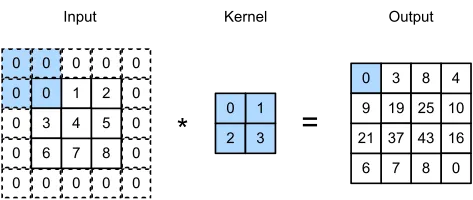

Comme on peut le voir ci dessus, le principe est simple. On possède en entrée une matrice (qui represente souvent une image), celle ci est ici complété avec des 0 autour, c'est ce qu'on appelle le padding.
Ensuite, on balade notre kernel sur la matrice d'entrée, en appliquant un produit scalaire.
Dans notre cas, cela donne 0x0 + 0x1 + 0x2 + 0x3 = 0
En répétant l'opération pour chaque carré de la matrice initiale, on obtient ainsi une matrice de sortie dite convolée 

Voila un exemple d'une implementation de cet opération :

In [11]:
# Matrice d'entrée
input_matrix = np.array([
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10],
    [11, 12, 13, 14, 15],
    [16, 17, 18, 19, 20],
    [21, 22, 23, 24, 25]
])

# Noyau
kernel = np.array([
    [1, 1],
    [1, 1]
])

# Taille de la matrice d'entrée
input_shape = input_matrix.shape

# Taille du noyau
kernel_shape = kernel.shape

# Initialiser la matrice convolée avec des zéros
output_matrix = np.zeros((input_shape[0] - kernel_shape[0] + 1, input_shape[1] - kernel_shape[1] + 1))

# Parcourir la matrice d'entrée pour appliquer la convolution
for i in range(output_matrix.shape[0]):
    for j in range(output_matrix.shape[1]):
        # Extraire la sous-matrice de la matrice d'entrée
        input_slice = input_matrix[i:i+kernel_shape[0], j:j+kernel_shape[1]]
        # Calculer le produit scalaire entre la sous-matrice et le noyau
        output_matrix[i, j] = np.sum(input_slice * kernel)

# Afficher la matrice convolée
print("Matrice convolée :")
print(output_matrix)

Matrice convolée :
[[16. 20. 24. 28.]
 [36. 40. 44. 48.]
 [56. 60. 64. 68.]
 [76. 80. 84. 88.]]


### Application des filtres usuels 

De nombreux filtres peuvent être utilisés dans l'extraction de données d'une image, voici certains des plus classiques. Pour illustrer les effets, nous utiliserons l'image de chat ci dessous, importée sur Python à l'aide de matplotlib ou de PIL.

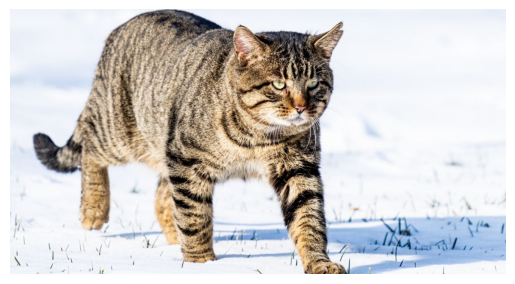

In [12]:
# Charger l'image à partir du fichier
img = mpimg.imread('chat.jpeg')

# Afficher l'image dans le notebook
plt.imshow(img)
plt.axis('off')  # Supprimer les axes
plt.show()

#### Filtre de détection de contours (Sobel, Prewitt, Roberts) :
Ces filtres sont utilisés pour détecter les contours dans une image en mettant en évidence les changements abrupts d'intensité.

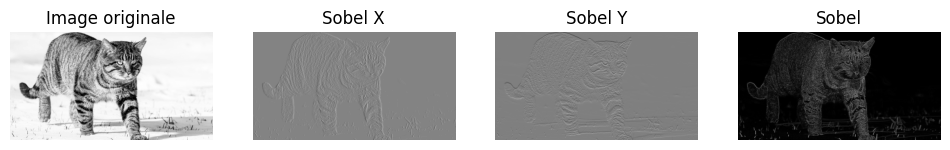

In [13]:
# Charger l'image en niveaux de gris
image = cv2.imread('chat.jpeg', cv2.IMREAD_GRAYSCALE)

# Appliquer le filtre de détection de contours de Sobel
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Appliquer le filtre de détection de contours de Prewitt
prewitt_x = cv2.filter2D(image, -1, kernel=np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))
prewitt_y = cv2.filter2D(image, -1, kernel=np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]))

# Appliquer le filtre de détection de contours de Roberts
roberts_x = cv2.filter2D(image, -1, kernel=np.array([[1, 0], [0, -1]]))
roberts_y = cv2.filter2D(image, -1, kernel=np.array([[0, 1], [-1, 0]]))

# Afficher les résultats
plt.figure(figsize=(12, 8))

plt.subplot(3, 4, 1), plt.imshow(image, cmap='gray')
plt.title('Image originale'), plt.axis('off')

plt.subplot(3, 4, 2), plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X'), plt.axis('off')

plt.subplot(3, 4, 3), plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel Y'), plt.axis('off')

plt.subplot(3, 4, 4), plt.imshow(cv2.magnitude(sobel_x, sobel_y), cmap='gray')
plt.title('Sobel'), plt.axis('off')

plt.show()










#### Filtre de lissage (moyenneur, gaussien) :
Les filtres de lissage sont utilisés pour réduire le bruit dans une image en moyennant les valeurs des pixels voisins, pour cela plusieurs méthodes peuvent être utilisées, comme une moyenne sur les pixels voisins, ou encore un flou gaussien.
Les images étant cependant un peu floues de base en raison de la résolution, il peut être intéressant d'utiliser PIL pour mieux voir les effets

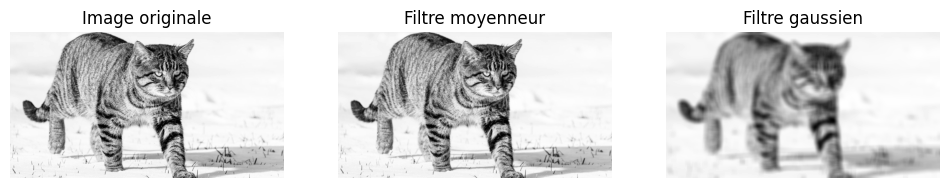

In [14]:
# Charger l'image
image = cv2.imread('chat.jpeg')

# Convertir l'image en niveaux de gris
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Appliquer le filtre moyenneur
average_blur = cv2.blur(gray_image, (3, 3))  # Kernel de taille 3x3

# Appliquer le filtre gaussien avec un noyau encore plus grand et un écart-type plus élevé pour augmenter le flou
gaussian_blur = cv2.GaussianBlur(gray_image, (31, 31), 20)  # Kernel de taille 31x31, écart-type 20

# Afficher les résultats
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Image originale')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(average_blur, cmap='gray')
plt.title('Filtre moyenneur')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gaussian_blur, cmap='gray')
plt.title('Filtre gaussien')
plt.axis('off')

plt.show()

#### Filtre de mise en évidence des bords (laplacien, LoG) :
Ces filtres sont utilisés pour mettre en évidence les bords dans une image en accentuant les changements de signe dans le gradient. 
Le filtre laplacien calcule la deuxième dérivée de l'image.
Le filtre LoG (Laplacian of Gaussian) est une combinaison du filtre gaussien et du filtre laplacien.
Comme on peut le voir ci dessous, le filtre LoG peut être intéressant quand le filtre laplacien ne suffit pas à mettre en evidence certains bords.

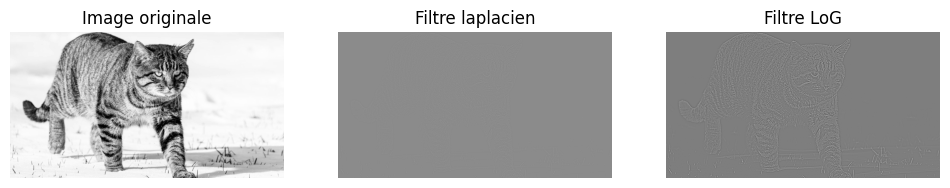

In [15]:
# Charger l'image
image = cv2.imread('chat.jpeg')

# Convertir l'image en niveaux de gris
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Appliquer le filtre laplacien
laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)

# Appliquer le filtre LoG (Laplacian of Gaussian)
gaussian_blur = cv2.GaussianBlur(gray_image, (5, 5), 0)  # Appliquer un flou gaussien pour réduire le bruit
log = cv2.Laplacian(gaussian_blur, cv2.CV_64F)

# Afficher les résultats
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Image originale')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(laplacian, cmap='gray')
plt.title('Filtre laplacien')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(log, cmap='gray')
plt.title('Filtre LoG')
plt.axis('off')

plt.show()

#### Filtre de mise en évidence des lignes droites (Hough) :
Le filtre de Hough est utilisé pour détecter les lignes droites dans une image en transformant les pixels de l'espace image en une représentation paramétrique de l'espace Hough.

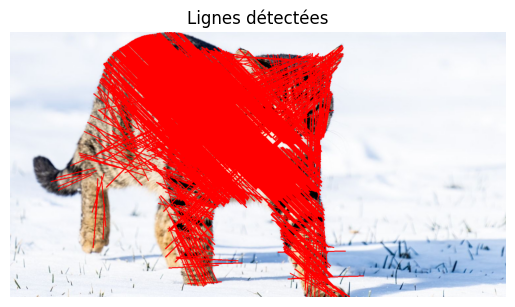

In [16]:
# Charger l'image
image = cv2.imread('chat.jpeg')

# Convertir l'image en niveaux de gris
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Appliquer le filtre de Canny pour la détection de contours
edges = cv2.Canny(gray_image, 50, 150, apertureSize=3)

# Appliquer la transformée de Hough pour la détection de lignes
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)

# Dessiner les lignes détectées sur l'image originale
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Afficher le résultat
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Lignes détectées')
plt.axis('off')
plt.show()

#### Filtre de mise en évidence des textures (filtre de Gabor) :
Le filtre de Gabor est utilisé pour détecter les textures dans une image en mesurant les variations locales d'intensité dans différentes orientations et à différentes échelles.
Il est souvent utilisé dans la reconnaissance de texture et la segmentation d'images.

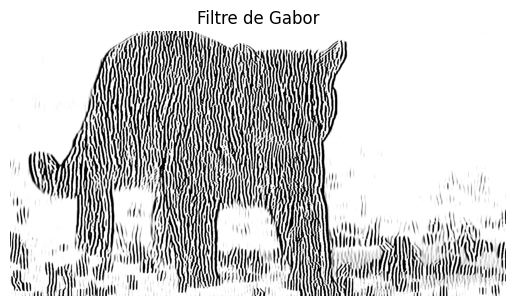

In [17]:
# Charger l'image
image = cv2.imread('chat.jpeg')

# Convertir l'image en niveaux de gris
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Appliquer le filtre de Gabor
kernels = []
for theta in range(4):  # Créer des filtres Gabor pour différentes orientations
    theta = theta / 4. * np.pi
    kernel = cv2.getGaborKernel((21, 21), 8.0, theta, 10.0, 0.5, 0, ktype=cv2.CV_32F)
    kernels.append(kernel)

filtered_images = []
for kernel in kernels:
    filtered_images.append(cv2.filter2D(gray_image, cv2.CV_8UC3, kernel))

# Afficher le résultat
plt.imshow(cv2.cvtColor(filtered_images[0], cv2.COLOR_GRAY2RGB))
plt.title('Filtre de Gabor')
plt.axis('off')
plt.show()

#### Filtre de fréquences (FTT):
Le filtre de fréquence, également connu sous le nom de transformée de Fourier rapide (FFT), est une technique utilisée en traitement d'image pour analyser les composantes de fréquence dans une image. La transformée de Fourier permet de passer de la représentation spatiale d'une image (dans le domaine spatial) à sa représentation fréquentielle (dans le domaine fréquentiel).

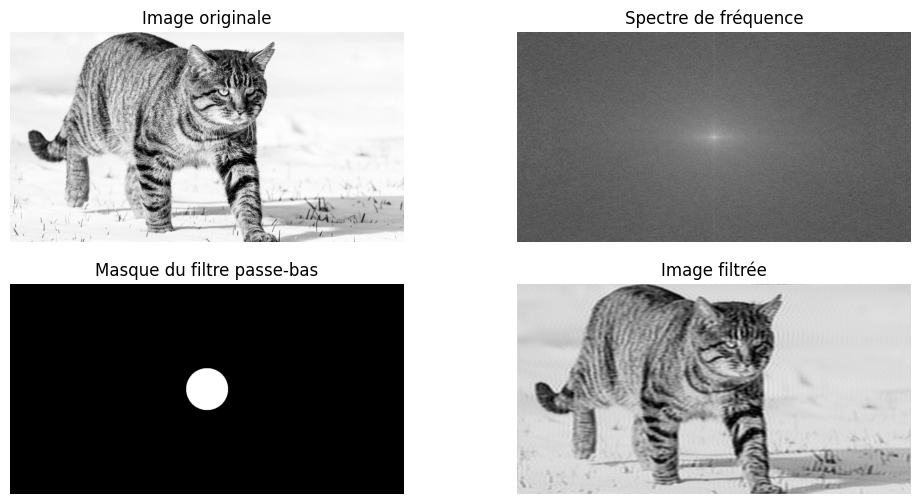

In [18]:
# Charger l'image en niveaux de gris
image = cv2.imread('chat.jpeg', cv2.IMREAD_GRAYSCALE)

# Appliquer la transformée de Fourier rapide (FFT)
fft_image = np.fft.fft2(image)
fft_shifted = np.fft.fftshift(fft_image)

# Calculer la magnitude de la transformée de Fourier
magnitude_spectrum = 20 * np.log(np.abs(fft_shifted))

# Créer un masque pour le filtre passe-bas
rows, cols = image.shape
crow, ccol = rows // 2 , cols // 2
mask = np.zeros((rows, cols), np.uint8)
r = 80  # Rayon du cercle pour le filtre passe-bas
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 1

# Appliquer le filtre passe-bas
fft_shifted_filtered = fft_shifted * mask

# Appliquer la transformée de Fourier inverse
ifft_shifted_filtered = np.fft.ifftshift(fft_shifted_filtered)
image_filtered = np.fft.ifft2(ifft_shifted_filtered)
image_filtered = np.abs(image_filtered)

# Afficher les images
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Image originale')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Spectre de fréquence')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(mask, cmap='gray')
plt.title('Masque du filtre passe-bas')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(image_filtered, cmap='gray')
plt.title('Image filtrée')
plt.axis('off')

plt.show()

#### Rotation : 
La rotation peut être utile pour augmenter la robustesse du modèle face aux variations d'orientation dans les données d'entraînement. En appliquant des rotations aléatoires aux images d'entraînement, le modèle peut mieux généraliser et être plus tolérant aux variations de position et d'orientation dans les données de test.

#### Zoom (mise à l'échelle) : 
La mise à l'échelle des images peut également aider à augmenter la robustesse du modèle en introduisant des variations d'échelle dans les données d'entraînement. Cela permet au modèle de mieux généraliser et d'être plus efficace dans la détection et la classification des objets à différentes échelles.

#### Translation : 
La translation peut être utilisée pour augmenter la diversité des données d'entraînement en déplaçant les objets dans les images. Cela peut aider à améliorer la capacité du modèle à détecter et à classifier les objets dans différentes positions spatiales.

## Padding :
Comme vu brièvement plus tôt, le padding est une technique consiste à ajouter des pixels supplémentaires autour des bords de l'image ou de la carte de caractéristiques avant l'application de la convolution.

### Interet :

On a vu dans l'exemple sur la matrice qu'appliquer un filtre de convolution pouvait réduire la taille de l'objet. Ainsi, en augmentant artificellement la taille de l'image à l'aide du padding, on peut s'assurer de préserver la taille souhaitée tout au long du CNN.
Il permet également de choisir la taille de sortie de la convolution, et peut par exemple servir pour maintenir la taille de l'entrée durant la descente de gradient.

Le padding permet également d'inclure les pixels des bords de l'image dans les filtres. En effet, sans padding, si le kernel est de taille n, n/2 pixels (ou (n-1)/2 selon la parité de n) ne seront pas considérés.

### Types de Padding :
Il existe principalement trois types de padding utilisés dans les CNN :
    - Le zero-padding, visant à rajouter des 0 au bord de l'image
    - Le valid-padding (ou no-padding), consistant à ne pas rajouter de pixels
    - Le reflect-padding, où les pixels de bords de l'images sont répétés pour ne pas ajouter des zéros artificels
    
Ci dessous nous avons implementé un padding de 100 pixels noirs autour de l'image à l'aide de tensorflow.

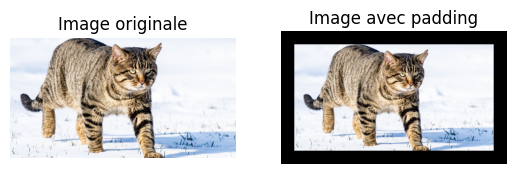

In [19]:
# Charger l'image
image_path = 'chat.jpeg'
image = plt.imread(image_path)

# Définir la taille du padding
padding = tf.constant([[100, 100], [100, 100], [0, 0]])

# Appliquer le padding à l'image
padded_image = tf.pad(image, padding, mode='CONSTANT')

# Afficher l'image originale
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Image originale')
plt.axis('off')

# Afficher l'image avec padding
plt.subplot(1, 2, 2)
plt.imshow(padded_image)
plt.title('Image avec padding')
plt.axis('off')

plt.show()

## Techniques de régularisation et de modulation dans les réseaux de neurones convolutionnels (CNN) :

De nombreuses méthodes existent pour améliorer les performances d'un CNN.
Nous allons discuter de certaines des plus classiques pour obtenir des CNN robustes et efficaces pour une grande variétés de taches, allant de la classification, à la segmentation.

### Fonctions d'activation :

Comme pour les réseaux de neurones classiques jouent un role essentiel dans les réseaux de neurones convolutionnels (CNN), apportant une non-linéarité cruciale à leurs opérations. 

Parmi celles-ci, ReLU est la plus couramment utilisée en raison de sa simplicité et de son efficacité. Elle remplace les valeurs négatives par zéro, facilitant ainsi l'apprentissage de caractéristiques complexes tout en évitant le problème de disparition du gradient. Bien que d'autres fonctions d'activation sont utilisées, telles que sigmoid et tanh, elles sont moins courantes dans les couches cachées des CNN en raison de leurs caractéristiques de saturation, qui peuvent ralentir l'apprentissage du réseau

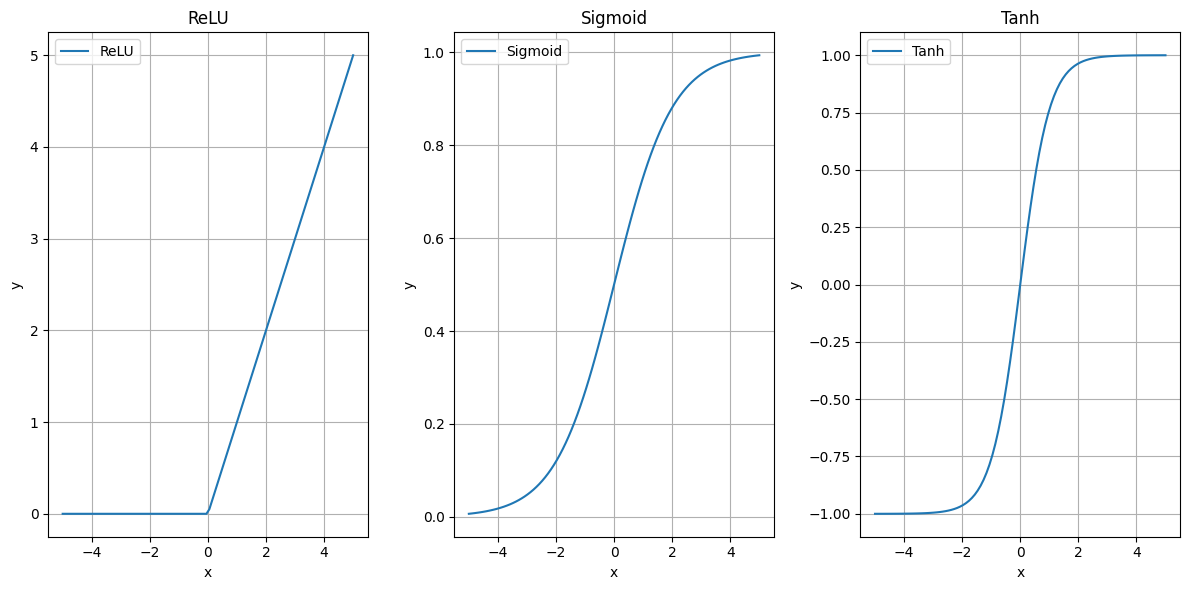

In [20]:
# Définition des fonctions d'activation
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

# Création des données d'entrée
x = np.linspace(-5, 5, 100)

# Calcul des sorties pour chaque fonction d'activation
y_relu = relu(x)
y_sigmoid = sigmoid(x)
y_tanh = tanh(x)

# Tracé des graphiques
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(x, y_relu, label='ReLU')
plt.title('ReLU')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(x, y_sigmoid, label='Sigmoid')
plt.title('Sigmoid')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(x, y_tanh, label='Tanh')
plt.title('Tanh')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### Pooling :
Le pooling est une opération fondamentale dans les réseaux de neurones convolutionnels (CNN) qui permet de réduire la dimensionnalité des caractéristiques extraites tout en préservant les informations les plus importantes
Cette opération est en générale utilisée après les couches de convolution, de sorte à réduire la taille des caractéristiques.

Comme pour les kernels, le max pooling se balade sur des sous matrices de taille k^2 de notre matrice de taille n^2, en séléctionannt à chaque fois la plus grande valeur

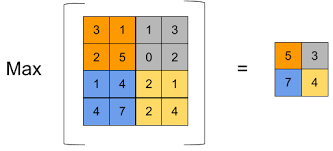

D'autres méthodes de pooling existent, comme le average pooling, qui lui fait la moyenne sur le carré.
Ces méthodes réduisent le nombre de paramètres du modèle, ce qui peut aider à prévenir le surapprentissage et il accélère le calcul en réduisant la taille des caractéristiques., mais en contrepartie rend les caractéristiques invariantes aux petites translations, ce qui peut impacter négativement le modèle et peut également entraîner une perte d'informations spatiales fines.
Il est donc important de d'ajuster empiriquement les paramètres de celui ci.

### Méthodes de régularisation et Dropout
Le dropout, la régularisation L1/L2 et la normalisation par lots sont des techniques de régularisation largement utilisées dans les réseaux de neurones convolutionnels (CNN) pour améliorer la généralisation du modèle et prévenir le surapprentissage.

#### Dropout :
Le dropout est une méthode de régularisation qui consiste à désactiver aléatoirement un certain pourcentage des neurones lors de l'entraînement du modèle forcant ainsi le modèle à apprendre des caractéristiques robustes et à ne pas trop s'adapter aux données d'entraînement spécifiques.

Ci dessous, on construit un réseau de neurones couche par couche, en créant 128 couches denses avec la fonction d'activation reLU. la fonction Dropout(0.5) qui suit s'applique donc aux 128 couches précédentes. 

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout

model = Sequential([
    Input(shape=(784,)),  # Utilisation d'un objet Input pour spécifier la forme des données d'entrée
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout de 50%
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

#### Régularisation L1/L2 :
La régularisation L1 et L2 ajoutent des termes de pénalité à la fonction de perte du modèle pour décourager les poids du réseau d'atteindre des valeurs trop élevées, permettant ainssi de limiter la complexité du modèle et d'éviter le surapprentissage.

Voila un exemple d'implementation ci dessous avec TensorFlow :

In [22]:
from tensorflow.keras import regularizers

model = Sequential([
    Dense(128, activation='relu', input_shape=(784,), kernel_regularizer=regularizers.l2(0.01)),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(10, activation='softmax')
])

c:\Users\Sun\.conda\envs\POKE_IA\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Normalisation par lots (Batchs normalization) :
La normalisation par lots est une technique qui normalise les activations de chaque couche en soustrayant la moyenne et en divisant par l'écart type des activations dans un mini-lot d'entraînement.
Cela permet d'accélerer la convergence du modèle et peut également régulariser en introduisant un bruit stochastique.

Voila un exemple d'implementation ci dessous, toujours avec TensorFlow :

In [23]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    BatchNormalization(),  # Batch normalization
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='softmax')
])

## Architectures classiques 
Les CNN étant depuis quelques années un domaine de recherche et d'innovation, de nombreuses architectures ont pu apparaitre au fil du temps, voici quelques noms :

    - LeNet-5 (1998)
    
    - AlexNet (2012)
    
    - VGG (2014)
    
    - GoogLeNet (Inception) (2014)
    
    - ResNet (2015)
    
    - MobileNet (2017)

De nouvelles architectures sont constamment développées, d'où l'intéret de se tenir au courant des développements récents dans ce domaine.

## Application : Construction d'un modèle de classification

En pratique, bien que les filtres mentionnés précédemment puissent être utilisés pour extraire des caractéristiques d'une image, les CNN apprennent leurs propres filtres adaptés à la tâche, permettant ainsi une extraction de caractéristiques plus flexible et optimisée au cours de l'apprentissage.

Notre objectif dans la suite et de construire un modèle de classification en utilisant les techniques vues précédemment.
Le dataset utilisé sera le suivant : 
    5 Flower Types Classification disponible sur Kaggle : [ici](https://www.kaggle.com/datasets/kausthubkannan/5-flower-types-classification-dataset)

In [24]:
import kagglehub
import os
import shutil

os.environ['KAGGLEHUB_CACHE_DIR'] = os.getcwd()

# Telecharger la dernière version du dataset 
path = kagglehub.dataset_download("kausthubkannan/5-flower-types-classification-dataset")

print("Path to dataset files:", path)



# Obtenir le répertoire de travail actuel
current_folder = os.getcwd()

# Définir le chemin source (l'endroit où le dataset est téléchargé)
source_path = path  # Chemin retourné par `dataset_download`

# Définir le chemin de destination (votre répertoire de travail actuel)
destination_path = os.path.join(current_folder, "5-flower-types-classification-dataset")

# Déplacer le répertoire du dataset vers le répertoire de travail actuel
shutil.move(source_path, destination_path)

# Afficher un message indiquant où le dataset a été déplacé
print(f"Dataset déplacé vers : {destination_path}")


100%|██████████| 242M/242M [00:22<00:00, 11.1MB/s] 

Extracting files...


Path to dataset files: C:\Users\Sun\.cache\kagglehub\datasets\kausthubkannan\5-flower-types-classification-dataset\versions\1


Error: Destination path 'd:\Project VS\Convolution filters and CNN\5-flower-types-classification-dataset\1' already exists

### Importer les images :
Commencons tout d'abord à importer les différentes images et les convertir en tableau numpy.
A cette étape là, pensez également à redimensionner les images et à créer les labels.
Penser aussi à indiquer le bon répertoire pour la variable data_dir

In [26]:
import os
import cv2
import numpy as np

# Chemin vers le répertoire contenant les sous-dossiers pour chaque classe
data_dir = r"d:\Project VS\Convolution filters and CNN\5-flower-types-classification-dataset\flower_images"

# Liste des classes de fleurs
classes = ["Lilly", "Lotus", "Orchid", "Sunflower", "Tulip"]

# Paramètres pour redimensionner les images
img_size = (224, 224)  # Taille des images
size = 224  # Taille utilisée pour l'entrée du modèle

# Initialisation des listes pour stocker les images et les labels
images = []
labels = []

# Parcourir chaque classe de fleurs
for class_name in classes:
    # Chemin vers le sous-dossier de la classe actuelle
    class_dir = os.path.join(data_dir, class_name)
    # Parcourir chaque image dans le sous-dossier
    for img_name in os.listdir(class_dir):
        # Chemin complet de l'image
        img_path = os.path.join(class_dir, img_name)
        # Charger l'image avec OpenCV
        img = cv2.imread(img_path)
        # Redimensionner l'image
        img = cv2.resize(img, img_size)
        # Ajouter l'image à la liste des images
        images.append(img)
        # Ajouter l'index de la classe à la liste des labels
        labels.append(classes.index(class_name))

# Convertir les listes en tableaux numpy
images = np.array(images)
labels = np.array(labels)

# Afficher la taille des tableaux d'images et de labels
print("Taille des images :", images.shape)
print("Taille des labels :", labels.shape)


Taille des images : (5000, 224, 224, 3)
Taille des labels : (5000,)


### Prétraitements des données :
Pour prétraiter les donnéees,on commencera par normalisée la valeur des pixels en la divisant par 255.
On pourrait également convertir en niveau de gris pour accélerer l'apprentissage, si les couleurs n'étaient pas importantes.

Certains filtres que l'on a vu précédemment pourraient être utilisés afin d'extraire certaines caractéristiques, ou même d'augmenter artificellement la quantité de données si cela était nécessaire.

In [27]:
# Normalisation des valeurs des pixels
images = images.astype(np.float32) / 255.0

# Redimensionnement des images 
# images = np.array([cv2.resize(img, img_size) for img in images])

# Conversion en niveaux de gris (si nécessaire)
# images = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images])

In [28]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Division des données en ensembles d'entraînement, de validation et de test
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

### Construction du modèle 
On peut maintenant procéder à la construction du modèle avec Tensorflow.
Pour cela on utilisera les différentes techniques vues dans ce notebook comme le Maxpooling, le Dropout et d'autres méthodes de régularisation.
N'hésitez pas à experimenter !

On Utilisera la fonction softmax pour la dernière couche, de sorte à obtenir la classe la plus probable.

On pourra également changer la fonction de perte.

In [29]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout

# Construction du modèle CNN
model = Sequential()
model.add(Input(shape=(size, size, 3)))  # Define the input shape here
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(5, activation='softmax'))

# Compilation du modèle
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Entrainements du modèle et évaluations des perfomances :
On peut maintenant procéder à l'entrainement du modèle en utilisant .fit.
On peut jouer sur le nombre d'epoques, tout en prenant bien en compte que cela peut être relativement long selon la taille du réseau de neurones défini à la partie précédente.
Selon le nombre d'époques, l'entrainement du réseau peut être très long, il peut donc être important d'activer l'utilisation du GPU si possible.

In [ ]:
# Entraînement du modèle
history=model.fit(X_train,y_train,validation_data=(X_val,y_val),batch_size=32, epochs=25, verbose=1)

Epoch 1/25
 87/100 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.3312 - loss: 2.1928

In [ ]:
# Évaluation du modèle sur l'ensemble de test
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Précision sur l'ensemble de test :", test_acc)

# Affichage de l'évolution de la perte et de la précision au fil des époques
plt.figure(figsize=(12, 6))

# Perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Précision
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()